#### 从数据库导入数据

In [1]:
import pymysql.cursors
import pandas as pd

db = pymysql.connect(host='localhost',user='root',password='root',db='lagou',charset='utf8',cursorclass=pymysql.cursors.DictCursor)
cursor = db.cursor()
sql = 'SELECT * FROM dataset;'
cursor.execute(sql)
result = cursor.fetchall()
df = pd.DataFrame(list(result))
db.close()

df

,jobNature,companySize,workYear,education,industryField,thirdType,salaryMin,salaryMax,nameUnfit,positionId,...,financeStage,firstType,secondType,district,salary,resumeProcessRate,resumeProcessDay,score,famousCompany,isFocus
0,全职,500-2000人,1-3年,本科,旅游,数据分析,18,35,0,6112946,...,D轮及以上,开发|测试|运维类,数据开发,福田区,18k-35k,100,1,199,0,1
1,全职,500-2000人,3-5年,本科,"消费生活,移动互联网",商业,15,25,0,6229664,...,C轮,产品|需求|项目类,数据分析,南山区,15k-25k,100,1,179,0,1
2,全职,2000人以上,5-10年,本科,金融,建模,15,30,0,6853427,...,上市公司,开发|测试|运维类,数据开发,福田区,15k-30k,100,1,130,1,0
3,全职,2000人以上,1-3年,本科,金融,Hadoop,20,30,0,6692363,...,不需要融资,开发|测试|运维类,数据开发,南山区,20k-30k,100,2,89,0,0
4,全职,2000人以上,1-3年,大专,"移动互联网,游戏",数据分析,8,10,0,6835783,...,不需要融资,产品|需求|项目类,数据分析,南山区,8k-10k,0,1,69,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,全职,2000人以上,3-5年,本科,社交,产品经理,15,25,1,5276304,...,上市公司,产品|需求|项目类,产品经理,南山区,15k-25k,100,1,10,1,0
271,全职,2000人以上,3-5年,本科,社交,数据挖掘,18,35,0,6842800,...,上市公司,开发|测试|运维类,数据开发,南山区,18k-35k,100,1,10,1,1
272,全职,2000人以上,3-5年,本科,社交,数据分析,20,40,0,5250466,...,上市公司,产品|需求|项目类,数据分析,南山区,20k-40k,100,1,10,1,1
273,全职,2000人以上,1-3年,本科,金融,数据分析,20,30,0,6391267,...,未融资,开发|测试|运维类,数据开发,南山区,20k-30k,15,1,4,1,0


#### 拆分训练集和测试集

In [2]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
X = pd.get_dummies(X).values
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 开始建立模型

In [3]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print('训练集准确率为：%s' %str(clf.score(X_train, y_train)))
print('测试集准确率为：%s' %str(clf.score(X_test, y_test)))

训练集准确率为：1.0
测试集准确率为：0.9120879120879121


#### 进行预测

In [4]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

预测每个类的概率(这个概率是叶中相同类的训练样本的分数)——不太看得懂

clf.predict_proba(X_test)

#### 输出规则图

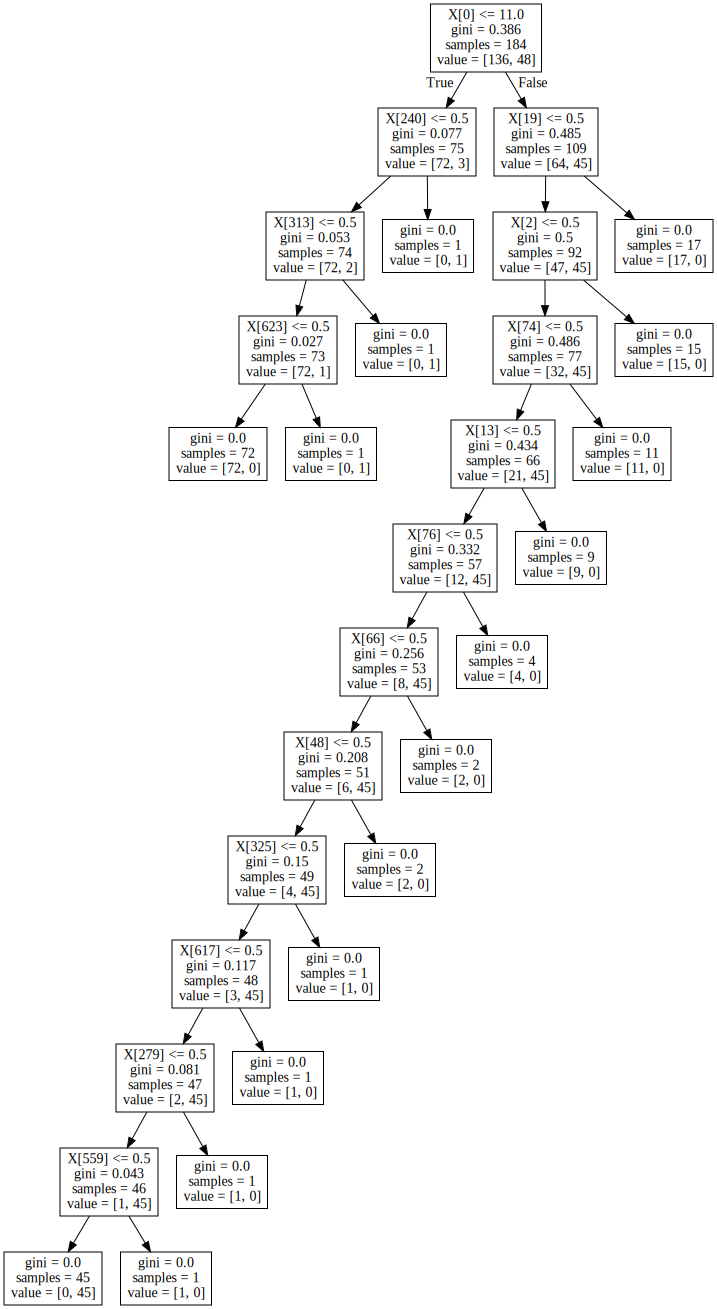

In [5]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

#### 保存规则图到文件

In [13]:
graph.render('D:/Jupyter/Data/result')    # format默认是pdf格式

'D:/Jupyter/Data\\result.png'

#### 美化规则图再输出

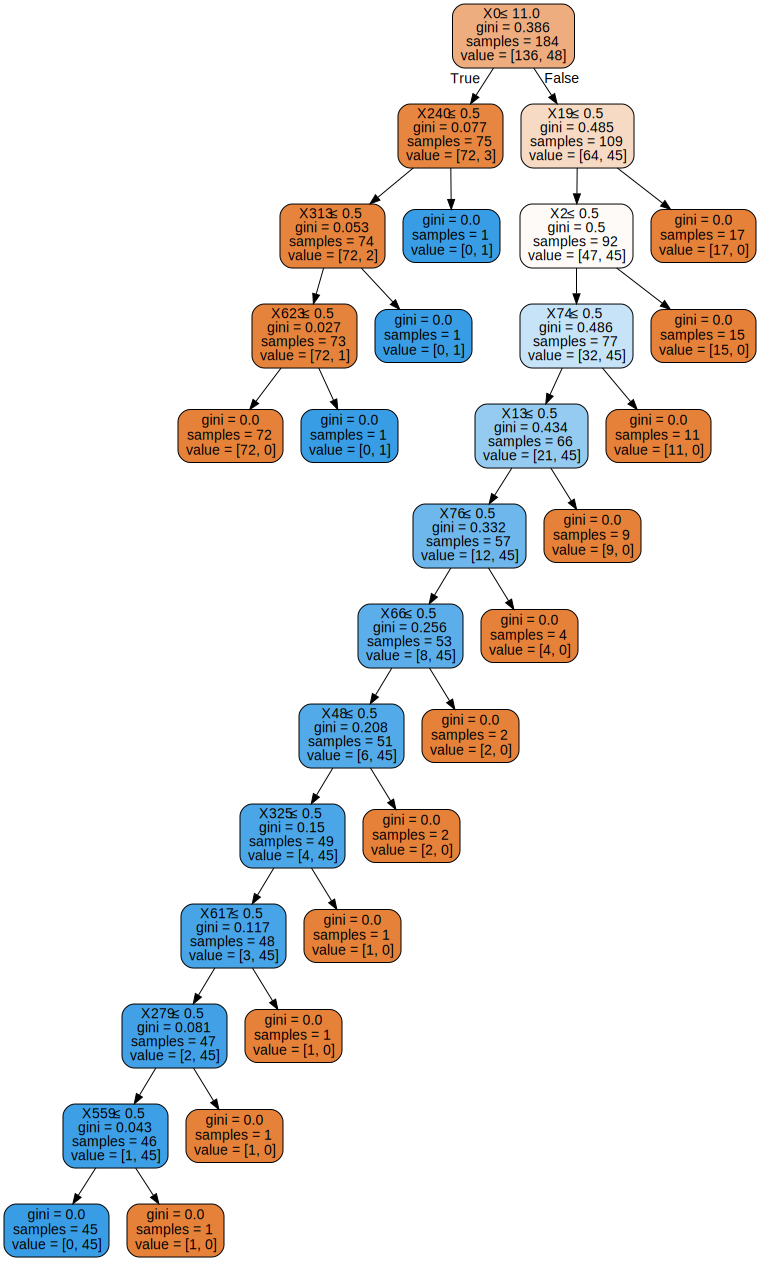

In [14]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                          #feature_names=df.feature_names,
                          #class_names=y.target_name,
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
# 保存到文件中
filePath = 'D:/Jupyter/Data/result'
graph.render(filePath, format='png', cleanup=True)    # format默认是pdf格式。设置cleanup才不会多出一个文件
graph

#### 让规则集中出现字段名称

In [4]:
feature_names = pd.get_dummies(df.iloc[:,:-1]).columns
feature_names

Index(['salaryMin', 'salaryMax', 'nameUnfit', 'resumeProcessRate',
       'resumeProcessDay', 'score', 'famousCompany', 'jobNature_全职',
       'jobNature_兼职', 'jobNature_实习',
       ...
       'salary_7k-13k', 'salary_7k-14k', 'salary_8k-10k', 'salary_8k-11k',
       'salary_8k-12k', 'salary_8k-13k', 'salary_8k-15k', 'salary_8k-16k',
       'salary_9k-12k', 'salary_9k-14k'],
      dtype='object', length=687)

Graphviz图片显示中文乱码问题：https://www.cnblogs.com/Maggieli/p/12113772.html

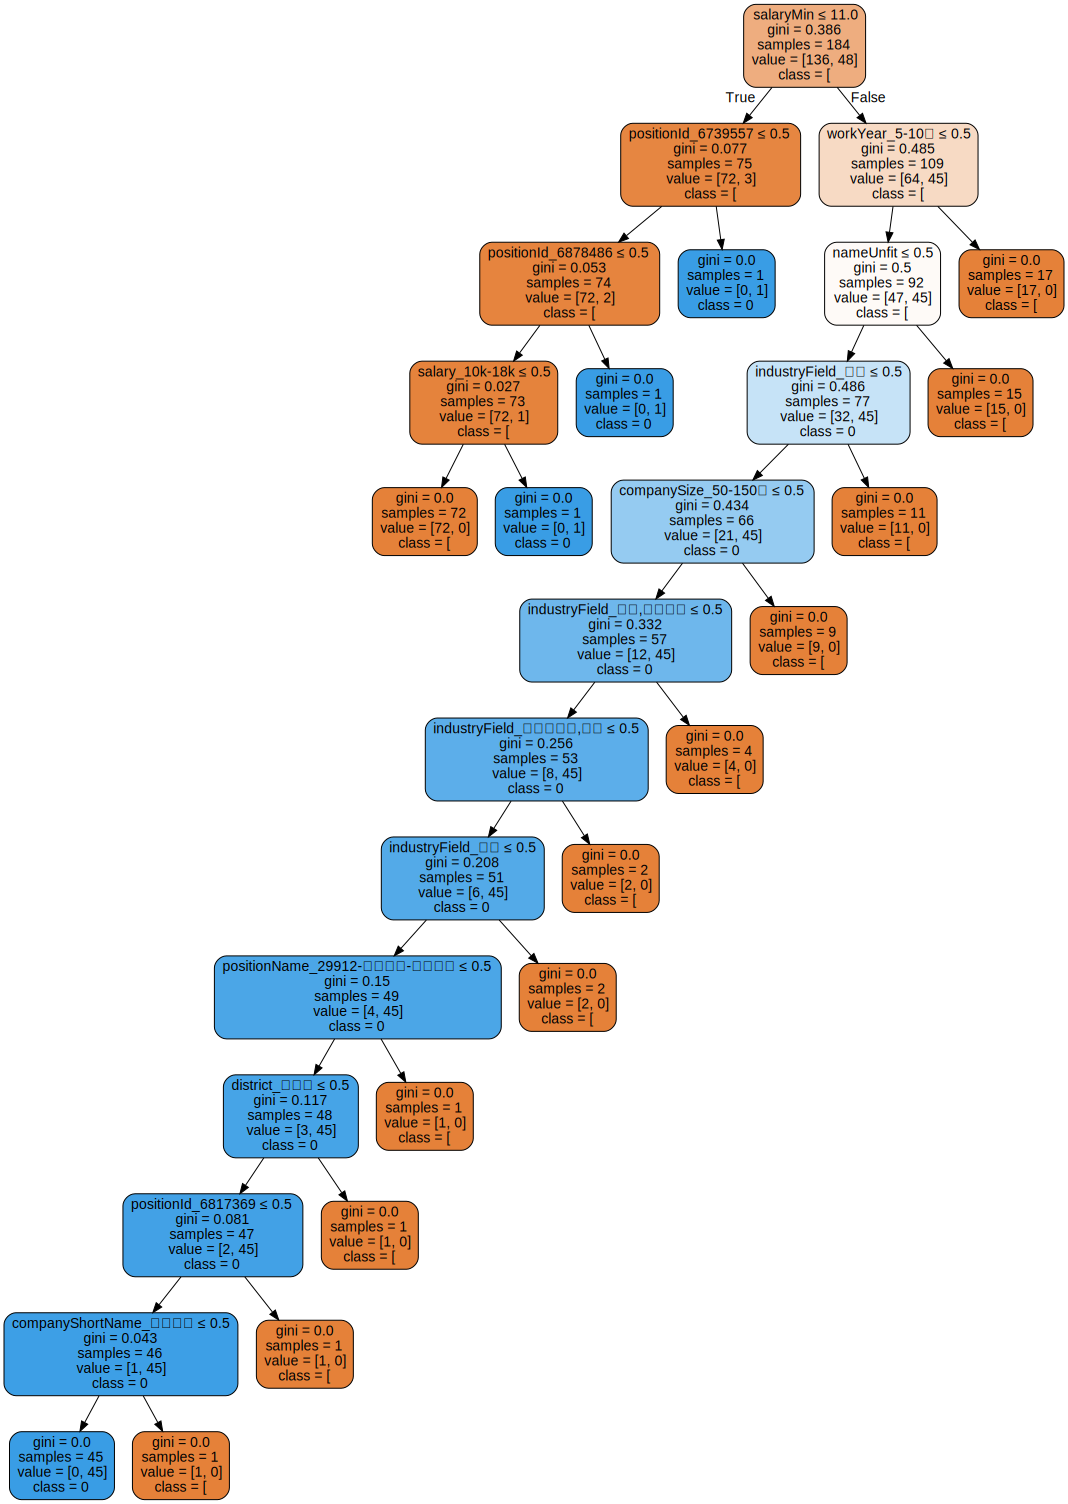

In [22]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                          feature_names=feature_names,
                          class_names=str(clf.classes_),    # 注意：classes后面有下划线。需要str()转换成字符串
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
# 保存到文件中
filePath = 'D:/Jupyter/Data/result'
graph.render(filePath, format='png', cleanup=True)
graph

#### 导出文本规则

In [51]:
from sklearn.tree.export import export_text
import numpy as np

t = export_text(clf, feature_names=list(feature_names))    # 注意：此处需要用list形式

# 保存到txt文件
np.savetxt('D:/satisfyModel.txt', pd.Series(t), fmt='%s')
print(t)

|--- salaryMin <= 11.00
|   |--- positionId_6739557 <= 0.50
|   |   |--- positionId_6878486 <= 0.50
|   |   |   |--- salary_10k-18k <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- salary_10k-18k >  0.50
|   |   |   |   |--- class: 1
|   |   |--- positionId_6878486 >  0.50
|   |   |   |--- class: 1
|   |--- positionId_6739557 >  0.50
|   |   |--- class: 1
|--- salaryMin >  11.00
|   |--- workYear_5-10年 <= 0.50
|   |   |--- nameUnfit <= 0.50
|   |   |   |--- industryField_金融 <= 0.50
|   |   |   |   |--- companySize_50-150人 <= 0.50
|   |   |   |   |   |--- industryField_金融,数据服务 <= 0.50
|   |   |   |   |   |   |--- industryField_移动互联网,游戏 <= 0.50
|   |   |   |   |   |   |   |--- industryField_游戏 <= 0.50
|   |   |   |   |   |   |   |   |--- positionName_29912-数据分析-运营开发 <= 0.50
|   |   |   |   |   |   |   |   |   |--- district_罗湖区 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- positionId_6817369 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2


#### 开始调参

In [111]:
?DecisionTreeClassifier

In [116]:
from sklearn.tree import DecisionTreeClassifier

# 需要设置random_state，否则每次运行准确率都不一样，无法调参
# 设置min_samples_leaf
# 设置max_depth（根据变量情况，实际结果进行调整，有效防止过拟合）
# 设置criterion，默认是gini，可改为entropy
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=3, max_depth=9)

clf = clf.fit(X_train, y_train)
print('训练集准确率为：%s' %str(clf.score(X_train, y_train)))
print('测试集准确率为：%s' %str(clf.score(X_test, y_test)))

训练集准确率为：0.9619565217391305
测试集准确率为：0.9010989010989011


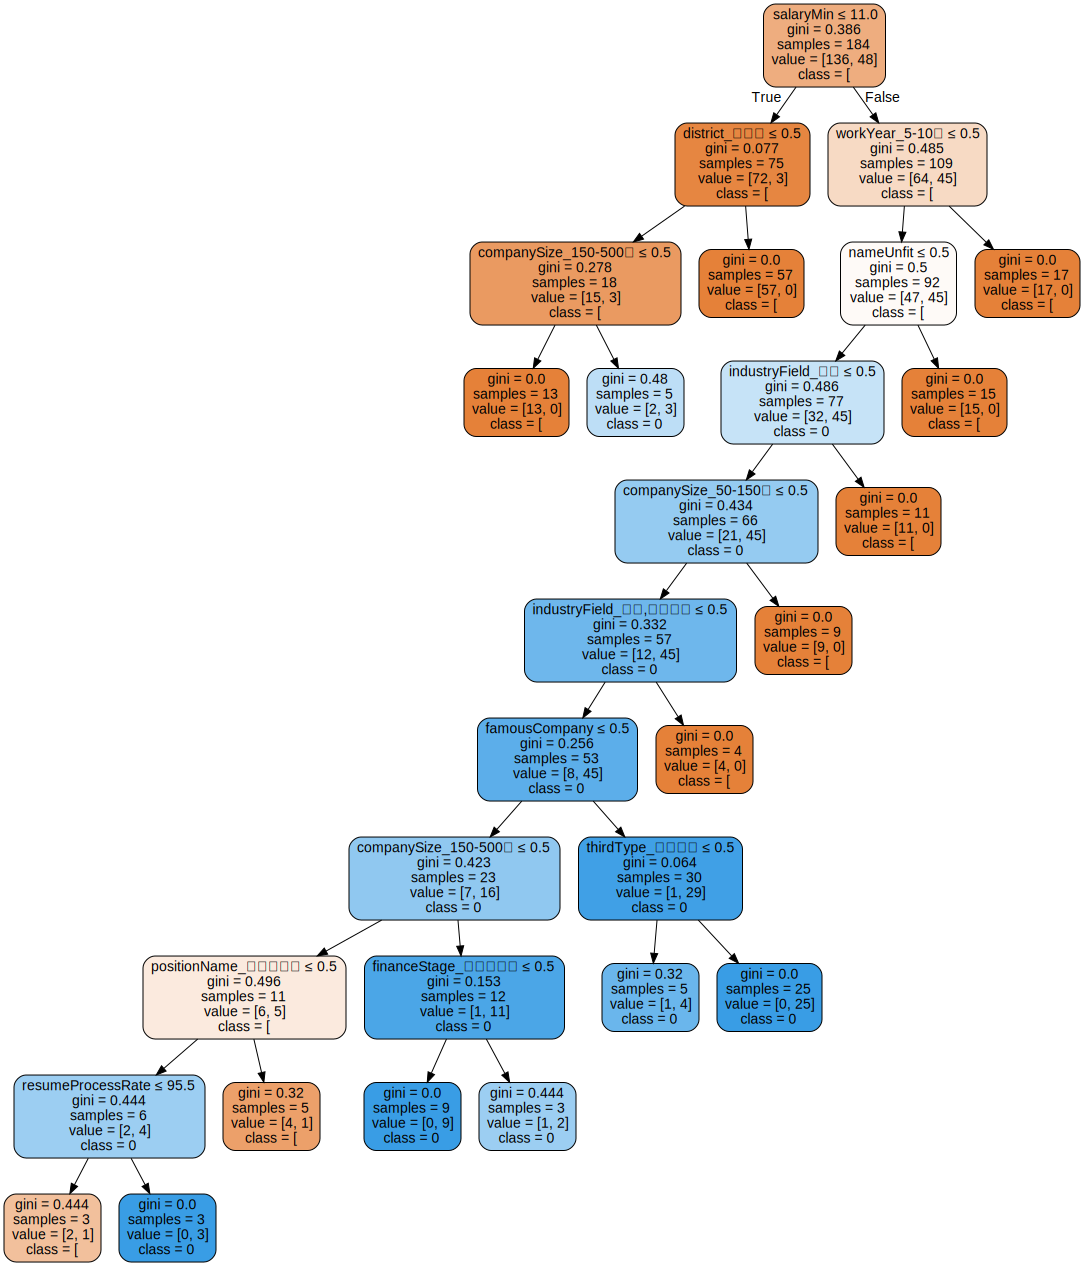

In [94]:
dot_data = export_graphviz(clf, out_file=None,
                          feature_names=feature_names,
                          class_names=str(clf.classes_),    # 注意：classes后面有下划线。需要str()转换成字符串
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
# 保存到PDF文件
#graph.render('D:/Jupyter/Data/result',format='png',cleanup=True)
graph

#### 网格搜索（含交叉验证）——找出最优参数

In [206]:
?GridSearchCV

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

DTC = DecisionTreeClassifier()
parameters = {
    'random_state':[0],
    'criterion':['gini','entropy'],
    'min_samples_leaf':[3,4,5,6,7],
    'max_depth':[7,8,9,10]
}
scorings = ['f1','roc_auc']
for scoring in scorings:
    print('===========================================================================')
    print('此次调参的scoring为：%s' % scoring)
    print()
    clf = GridSearchCV(DTC, parameters, scoring=scoring, cv=10)
    clf.fit(X_train, y_train)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']
    print('【交叉验证】过程如下：')
    for mean, std, param in zip(means, stds, params):
        print('%s得分为 %0.3f(+-%0.3f)时，参数为：%r' % (scoring, mean, std * 2, param))
    print()
    print('【训练集】最佳参数为：%r' % clf.best_params_)
    print('【训练集】最佳参数得分为：%0.3f' % clf.best_score_)
    print()
    print('【测试集】%s得分为：%0.3f' % (scoring, clf.score(X_test, y_test)))    # 直接获取测试集的得分
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    reports = classification_report(y_true, y_pred)
    print('【测试集中实际值与预测值对比】模型报告如下：')
    print(reports)

此次调参的scoring为：f1



C:\Users\romak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


【交叉验证】过程如下：
f1得分为 0.671(+-0.392)时，参数为：{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'random_state': 0}
f1得分为 0.747(+-0.357)时，参数为：{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'random_state': 0}
f1得分为 0.747(+-0.338)时，参数为：{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5, 'random_state': 0}
f1得分为 0.755(+-0.352)时，参数为：{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 6, 'random_state': 0}
f1得分为 0.739(+-0.282)时，参数为：{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7, 'random_state': 0}
f1得分为 0.662(+-0.409)时，参数为：{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3, 'random_state': 0}
f1得分为 0.744(+-0.380)时，参数为：{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'random_state': 0}
f1得分为 0.745(+-0.334)时，参数为：{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5, 'random_state': 0}
f1得分为 0.746(+-0.343)时，参数为：{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 6, 'random_state': 0}
f1得分为 0.739(+-0.282)时，参数为：{'criter

C:\Users\romak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


##### 交叉验证（得分）——比较少单独使用

交叉验证，相当于利用训练集的数据作为验证集的数据，提前让训练集数据得到泛化的结果。

实际上，在执行GridSearchCV时，已经是在交叉验证地进行网格搜索了。

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 需要设置random_state，否则每次运行准确率都不一样，无法调参
# 设置min_samples_leaf
# 设置max_depth（根据变量情况，实际结果进行调整，有效防止过拟合）
# 设置criterion，默认是gini，可改为entropy
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=9, min_samples_leaf=5)

# 交叉验证
score_train = cross_val_score(clf, X_train, y_train, scoring='f1', cv=10)
score_test = cross_val_score(clf, X_test, y_test, scoring='f1', cv=10)
score_train_roc_auc = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=10)
score_test_roc_auc = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=10)
print('【交叉验证】训练集的F1值为：%0.3f' %score_train.mean())
print('【交叉验证】测试集的F1值为：%0.3f' %score_test.mean())
print('【交叉验证】训练集的roc_auc值为：%0.3f' %score_train_roc_auc.mean())
print('【交叉验证】测试集的roc_auc值为：%0.3f' %score_test_roc_auc.mean())

【交叉验证】训练集的F1值为：0.778
【交叉验证】测试集的F1值为：0.434
【交叉验证】训练集的roc_auc值为：0.954
【交叉验证】测试集的roc_auc值为：0.803
